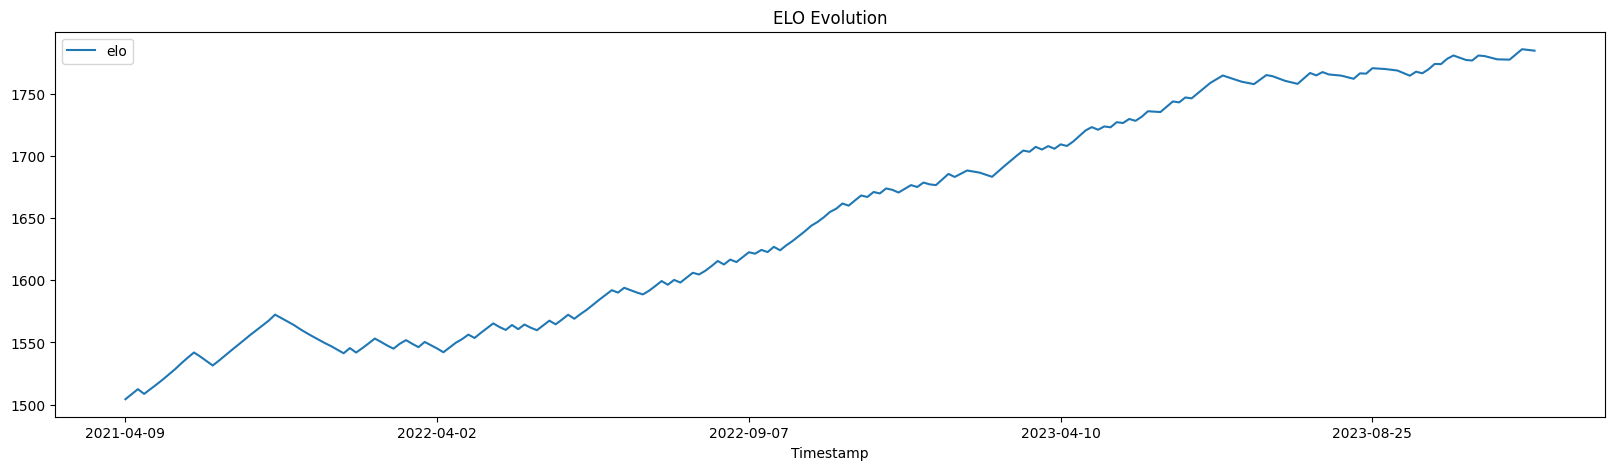

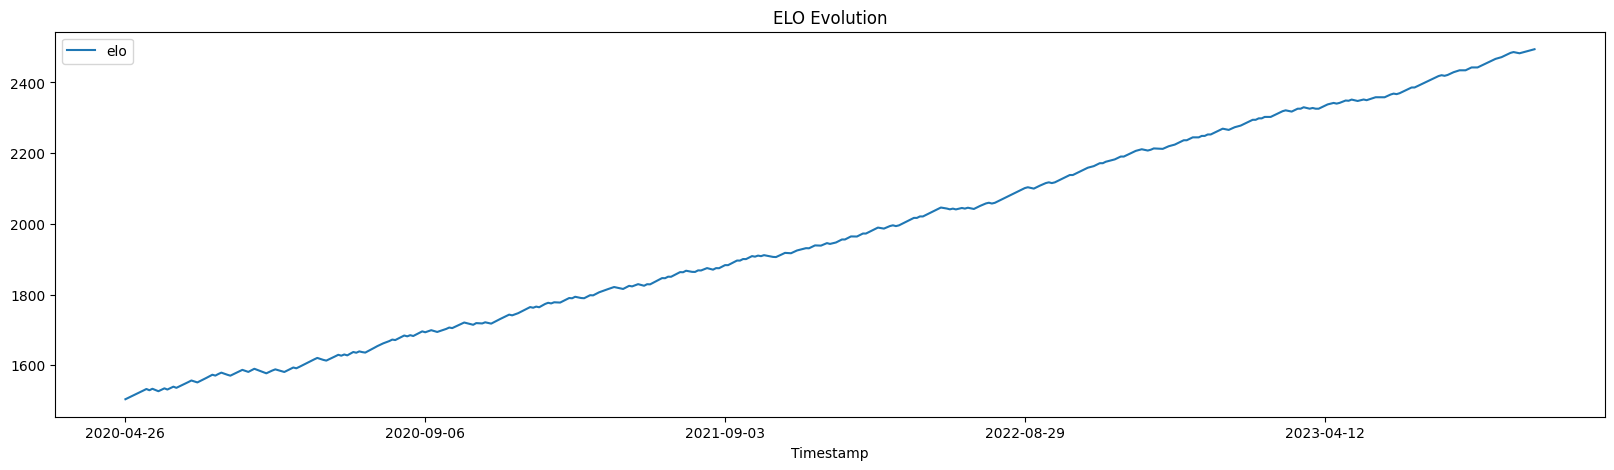

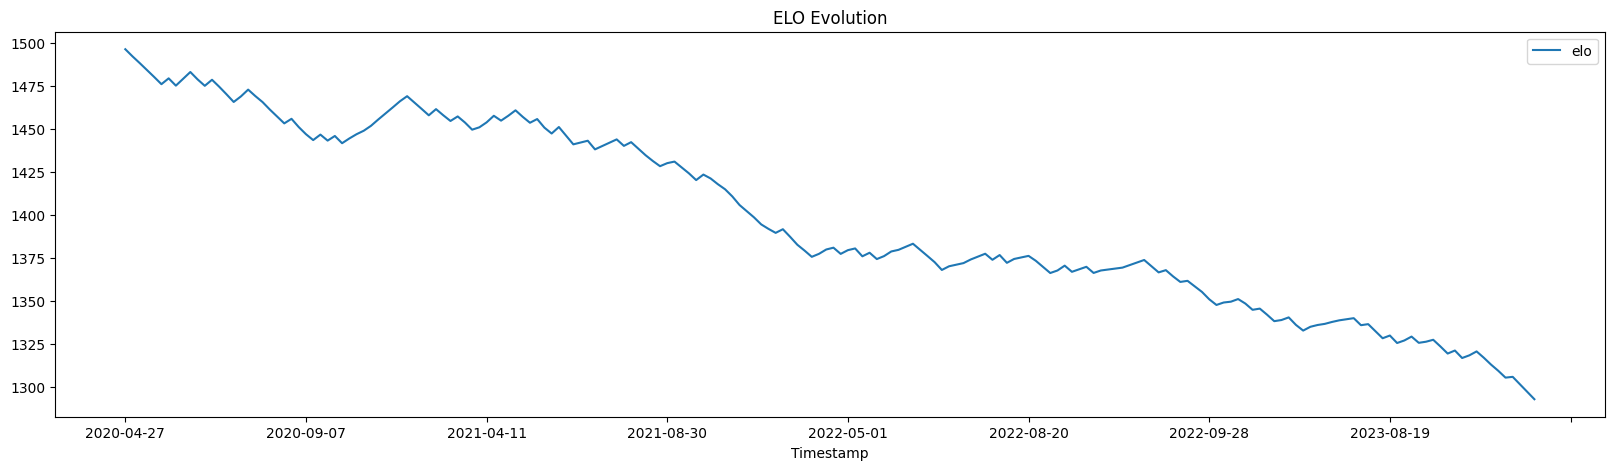

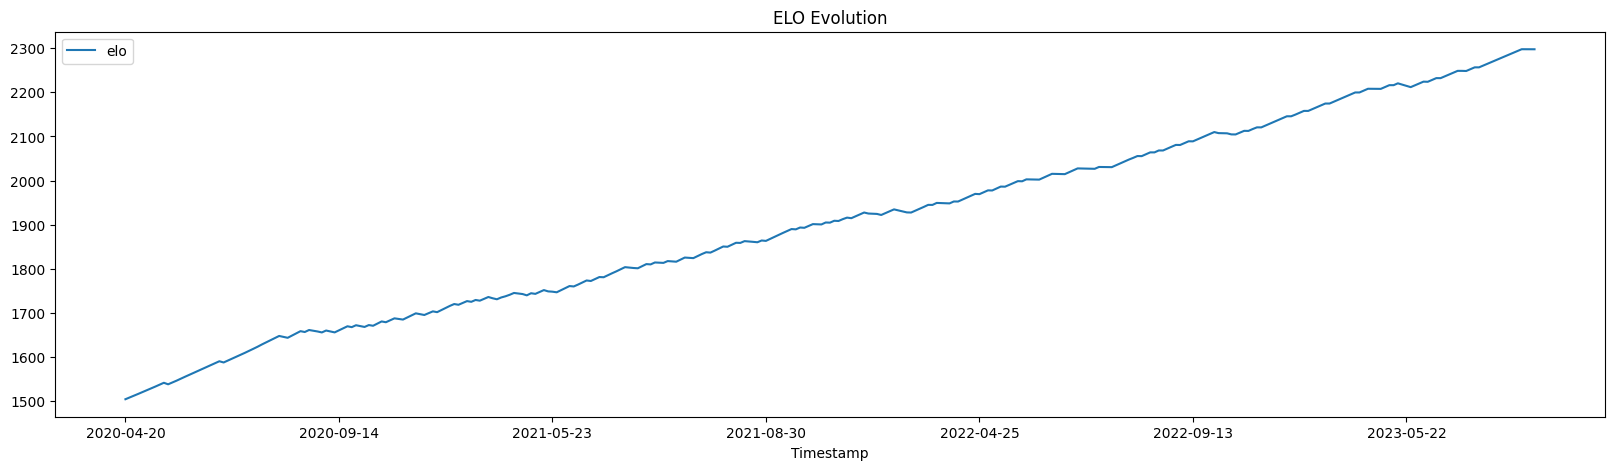

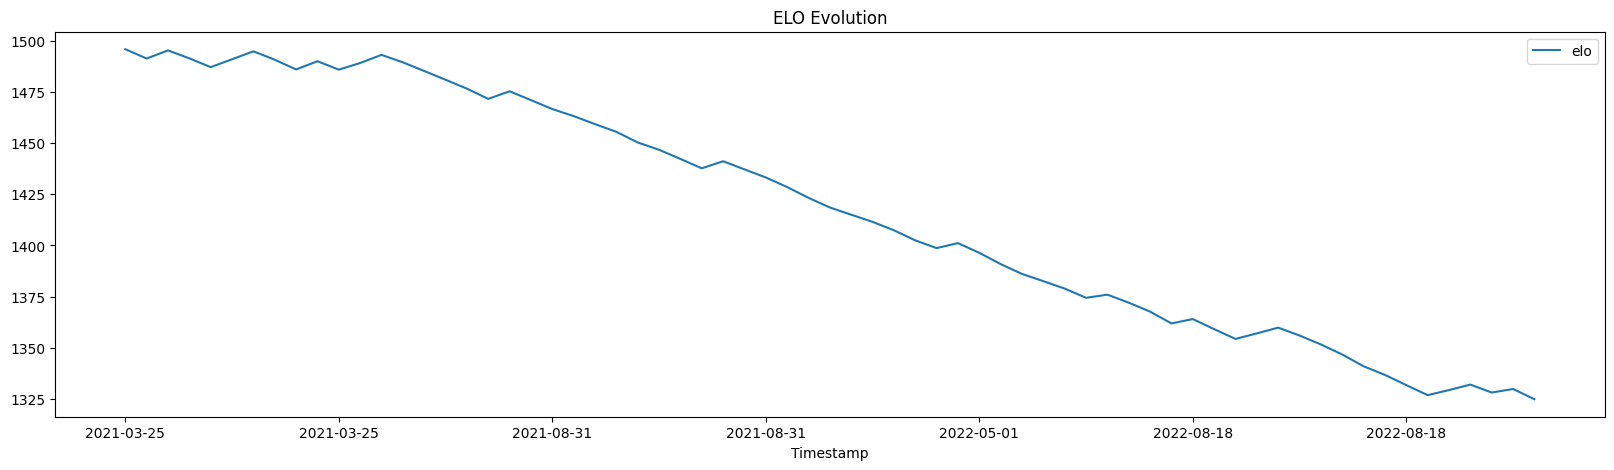

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

def getFile(path):
    fd = os.open(path, os.O_RDONLY)
    data = os.read(fd, os.path.getsize(path))
    data = json.loads(data)
    os.close(fd)
    return data

elos = getFile("../data/elo/elo.json")
interesting = ["105550059790656435", "100205573495116443", "99322214689444546", "98767991877340524", "102787200138722262"]

for team in interesting:
    eloData = elos[team]

    eloData.sort(key=lambda x: x["timestamp"])
    dates = pd.to_datetime([d['timestamp'] for d in eloData])

    eloGraph = pd.DataFrame({
        'elo': [d['elo'] for d in eloData],
    }, index=dates)
    # reds = [None] * offset + winrate(sorted, "red", offset)[offset:]
    # blues = [None] * offset + winrate(sorted, "blue", offset)[offset:]

    # winrates = pd.DataFrame({
    #     'blue': blues,
    #     'red': reds,
    # }, index=dates)

    eloGraph.plot(title="ELO Evolution", xlabel="Timestamp", figsize=(20, 5))